In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


(28, 28)


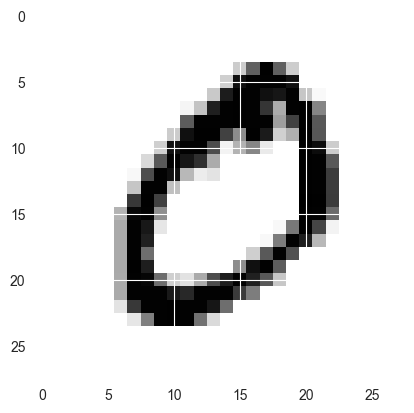

In [26]:
%matplotlib inline

sample = 1
image = x_train[sample]
print(image.shape)
plt.imshow(image, cmap='gray_r')

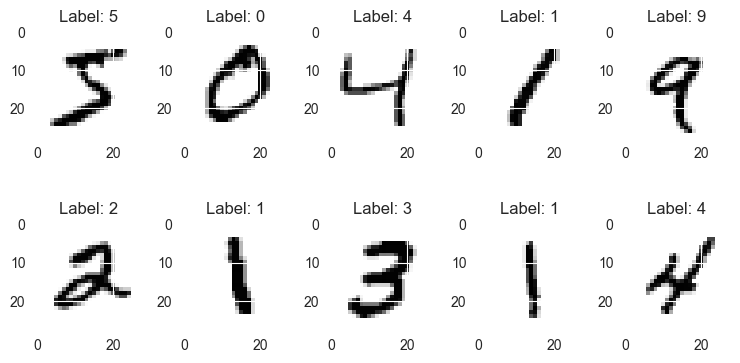

In [27]:
num = 10
images = x_train[:num]
labels = y_train[:num]

num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [28]:
x_train, x_test = x_train / 255.0, x_test / 255.0

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [29]:
def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28), name='layers_flatten'),
        tf.keras.layers.Dense(512, activation='relu', name='layers_dense'),
        tf.keras.layers.Dropout(0.2, name='layers_dropout'),
        tf.keras.layers.Dense(10, activation='softmax', name='layers_dense_2')
    ])


In [30]:
import datetime
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train,
          y=y_train,
          epochs=5,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2196 - accuracy: 0.9343 - val_loss: 0.1019 - val_accuracy: 0.9694
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0965 - accuracy: 0.9704 - val_loss: 0.0774 - val_accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0706 - accuracy: 0.9779 - val_loss: 0.0691 - val_accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0527 - accuracy: 0.9834 - val_loss: 0.0668 - val_accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0433 - accuracy: 0.9868 - val_loss: 0.0734 - val_accuracy: 0.9792


Launching TensorBoard...

# STEP 1: softmax without deep learning

In [19]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# print(len(x_train), len(x_test))
# print(x_train.shape, x_test.shape)
x_train = tf.reshape(x_train, [x_train.shape[0], -1])

one_batch = 200

def get_train_batch_data(size: int):
    def batch(n: int):
        start = n * size
        end = start + size
        return x_train[start:end], y_train[start:end]

    return batch

def train(weight, bias):
    next_batch = get_train_batch_data(one_batch)
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

    size = 28 * 28
    
    epochs = 20
    for epoch in range(epochs):
        avg_loss = 0.
        batch_total = x_train.shape[0] // one_batch
        for n in range(batch_total):
            x, y_o = next_batch(n)
            y = tf.one_hot(y_o, depth=10)
    
            with tf.GradientTape() as tape:
                h = tf.matmul(x, weight) + bias
                # print(hypothesis.shape, y.shape)                
                loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=h))
                grads = tape.gradient(loss, [W, b])
                optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
                avg_loss += loss / batch_total
        print(f'epoch: {epoch}, loss: {avg_loss}')


W = tf.Variable(tf.cast(tf.random.normal([size, 10]), dtype=tf.float64), dtype=tf.float64)
b = tf.Variable(tf.cast(tf.random.normal([10]), dtype=tf.float64), dtype=tf.float64)

train(W, b)
print("=" * 50)
test_set = tf.reshape(x_test, [x_test.shape[0], -1])
hypothesis = tf.matmul(test_set, W) + b
result_set = tf.one_hot(y_test, depth=10)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(result_set, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: {:.2f} %".format(accuracy.numpy() * 100))


epoch: 0, loss: 8.908949292931963
epoch: 1, loss: 3.2698696507294605
epoch: 2, loss: 1.8545223395858663
epoch: 3, loss: 1.3439924604550701
epoch: 4, loss: 1.0918578828622745
epoch: 5, loss: 0.9416447468904642
epoch: 6, loss: 0.8407395246950469
epoch: 7, loss: 0.7671435979448379
epoch: 8, loss: 0.710370729536096
epoch: 9, loss: 0.6647868461884312
epoch: 10, loss: 0.6271082345038496
epoch: 11, loss: 0.5953027407234935
epoch: 12, loss: 0.5680290848023618
epoch: 13, loss: 0.5443487487728148
epoch: 14, loss: 0.5235771659209127
epoch: 15, loss: 0.5051977685691152
epoch: 16, loss: 0.4888107766801182
epoch: 17, loss: 0.47410226006250294
epoch: 18, loss: 0.4608225771747743
epoch: 19, loss: 0.44877015666687686
Accuracy: 89.24 %


# STEP 2: softmax with deep learning

In [26]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# print(len(x_train), len(x_test))
# print(x_train.shape, x_test.shape)
x_train = tf.reshape(x_train, [x_train.shape[0], -1])

one_batch = 200

def get_train_batch_data(size: int):
    def batch(n: int):
        start = n * size
        end = start + size
        return x_train[start:end], y_train[start:end]

    return batch

def train(w1, bias1, w2, bias2, w3, bias3):
    next_batch = get_train_batch_data(one_batch)
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
    epochs = 20
    for epoch in range(epochs):
        avg_loss = 0.
        batch_total = x_train.shape[0] // one_batch
        for n in range(batch_total):
            x, y_o = next_batch(n)
            y = tf.one_hot(y_o, depth=10)
    
            with tf.GradientTape() as tape:
                l1 = tf.nn.relu(tf.matmul(x, w1) + bias1)
                l2 = tf.nn.relu(tf.matmul(l1, w2) + bias2)
                h = tf.matmul(l2, w3) + bias3
                # print(hypothesis.shape, y.shape)
                loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=h))
                grads = tape.gradient(loss, [W3, b3, W2, b2, W1, b1])
                optimizer.apply_gradients(grads_and_vars=zip(grads, [w3, bias3, w2, bias2, w1, bias1]))
                avg_loss += loss / batch_total
        print(f'epoch: {epoch}, loss: {avg_loss}')

W1 = tf.Variable(tf.cast(tf.random.normal([28 * 28, 256]), dtype=tf.float64), dtype=tf.float64)
b1 = tf.Variable(tf.cast(tf.random.normal([256]), dtype=tf.float64), dtype=tf.float64)
W2 = tf.Variable(tf.cast(tf.random.normal([256, 256]), dtype=tf.float64), dtype=tf.float64)
b2 = tf.Variable(tf.cast(tf.random.normal([256]), dtype=tf.float64), dtype=tf.float64)
W3 = tf.Variable(tf.cast(tf.random.normal([256, 10]), dtype=tf.float64), dtype=tf.float64)
b3 = tf.Variable(tf.cast(tf.random.normal([10]), dtype=tf.float64), dtype=tf.float64)

train(W1, b1, W2, b2, W3, b3)
print("=" * 50)
test_set = tf.reshape(x_test, [x_test.shape[0], -1])
L1 = tf.nn.relu(tf.matmul(test_set, W1) + b1)
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
hypothesis = tf.matmul(L2, W3) + b
result_set = tf.one_hot(y_test, depth=10)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(result_set, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: {:.2f} %".format(accuracy.numpy() * 100))


epoch: 0, loss: 206.18405199263685
epoch: 1, loss: 52.955589399515844
epoch: 2, loss: 34.07808694359822
epoch: 3, loss: 24.434989353101763
epoch: 4, loss: 18.660159125049802
epoch: 5, loss: 14.639887847358015
epoch: 6, loss: 11.838613718284822
epoch: 7, loss: 9.548790115966737
epoch: 8, loss: 7.765100485391849
epoch: 9, loss: 6.289081038527013
epoch: 10, loss: 4.981775911708433
epoch: 11, loss: 4.041655426712185
epoch: 12, loss: 3.2565316663298813
epoch: 13, loss: 2.683193386573092
epoch: 14, loss: 2.098598421000642
epoch: 15, loss: 1.7739287567185738
epoch: 16, loss: 1.3623063414937233
epoch: 17, loss: 1.0831835474285856
epoch: 18, loss: 0.909539322269029
epoch: 19, loss: 0.8301544957152175
Accuracy: 93.74 %


# STEP 3: using initializer

In [29]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# print(len(x_train), len(x_test))
# print(x_train.shape, x_test.shape)
x_train = tf.reshape(x_train, [x_train.shape[0], -1])

one_batch = 200

def get_train_batch_data(size: int):
    def batch(n: int):
        start = n * size
        end = start + size
        return x_train[start:end], y_train[start:end]

    return batch

def train(w1, bias1, w2, bias2, w3, bias3):
    next_batch = get_train_batch_data(one_batch)
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
    epochs = 20
    for epoch in range(epochs):
        avg_loss = 0.
        batch_total = x_train.shape[0] // one_batch
        for n in range(batch_total):
            x, y_o = next_batch(n)
            y = tf.one_hot(y_o, depth=10)

            with tf.GradientTape() as tape:
                l1 = tf.nn.relu(tf.matmul(x, w1) + bias1)
                l2 = tf.nn.relu(tf.matmul(l1, w2) + bias2)
                h = tf.matmul(l2, w3) + bias3
                # print(hypothesis.shape, y.shape)
                loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=h))
                grads = tape.gradient(loss, [W3, b3, W2, b2, W1, b1])
                optimizer.apply_gradients(grads_and_vars=zip(grads, [w3, bias3, w2, bias2, w1, bias1]))
                avg_loss += loss / batch_total
        print(f'epoch: {epoch}, loss: {avg_loss}')

def initialize(shape):
    xavier = tf.keras.initializers.GlorotNormal()
    return tf.Variable(dtype=tf.float64, initial_value=tf.cast(xavier(shape=shape), dtype=tf.float64))

W1 = initialize([28 * 28, 256])
b1 = tf.Variable(tf.cast(tf.random.normal([256]), dtype=tf.float64), dtype=tf.float64)
W2 = initialize([256, 256])
b2 = tf.Variable(tf.cast(tf.random.normal([256]), dtype=tf.float64), dtype=tf.float64)
W3 = initialize([256, 10])
b3 = tf.Variable(tf.cast(tf.random.normal([10]), dtype=tf.float64), dtype=tf.float64)

train(W1, b1, W2, b2, W3, b3)
print("=" * 50)
test_set = tf.reshape(x_test, [x_test.shape[0], -1])
L1 = tf.nn.relu(tf.matmul(test_set, W1) + b1)
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
hypothesis = tf.matmul(L2, W3) + b
result_set = tf.one_hot(y_test, depth=10)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(result_set, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: {:.2f} %".format(accuracy.numpy() * 100))


epoch: 0, loss: 0.3949171309051507
epoch: 1, loss: 0.152293198898593
epoch: 2, loss: 0.1014080358499027
epoch: 3, loss: 0.07388760076152175
epoch: 4, loss: 0.055020364137255966
epoch: 5, loss: 0.0418524267987594
epoch: 6, loss: 0.031901230935624865
epoch: 7, loss: 0.02518989108583294
epoch: 8, loss: 0.02027238883805962
epoch: 9, loss: 0.018581281590120458
epoch: 10, loss: 0.016990335379880886
epoch: 11, loss: 0.016351778189801956
epoch: 12, loss: 0.015335369093298544
epoch: 13, loss: 0.012323849268148118
epoch: 14, loss: 0.011064394656326124
epoch: 15, loss: 0.007591610511956022
epoch: 16, loss: 0.006231411921299648
epoch: 17, loss: 0.006979803614589486
epoch: 18, loss: 0.006209346902250147
epoch: 19, loss: 0.005865655238245861
Accuracy: 97.46 %


# STEP 4: using CNN with Keras

In [28]:
import numpy as np
import keras
from keras import layers
from keras.utils import to_categorical

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
epochs = 3

model = keras.Sequential(
    [
        layers.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

model.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1
)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                 